In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
df = pd.read_csv('Indeed.csv')

In [2]:
df.describe()

,Issued time,Star review,Number of reviews,Min salary,Max salary,Average salary
count,1787.000000,743.000000,743.000000,380.000000,380.000000,380.000000
mean,21.911024,3.775236,3766.588156,41077.672158,55868.873684,48473.272921
std,10.800099,0.387306,7625.650957,77686.267072,91789.549293,83939.440240
min,0.000000,1.500000,2.000000,3000.000000,3000.000000,3000.000000
25%,13.000000,3.600000,26.500000,21680.000000,29810.000000,25558.750000
50%,30.000000,3.800000,315.000000,27100.000000,37940.000000,32520.000000
75%,30.000000,4.000000,3660.000000,35230.000000,52574.000000,43360.000000
max,30.000000,5.000000,60791.000000,800000.000000,800000.000000,800000.000000


In [3]:
hk_df = df[df['Country'] == 'Hong Kong'].reset_index()
sg_df = df[df['Country'] == 'Singapore'].reset_index()
df_ls = [hk_df, sg_df]



# Data Size by Job Category

- Imbalanced Data Size

- Lead to inaccuracy to all analysis for Data Scientist


In [4]:
for region_df in df_ls:
    print(region_df['Country'][0])
    print(region_df['Job category'].value_counts())

Hong Kong
Data analyst      497
Data scientist    145
Name: Job category, dtype: int64
Singapore
Data analyst      711
Data scientist    434
Name: Job category, dtype: int64


### Findings
Singapore provides more data job offers than Hong Kong.

# Salary Distribution 

- To prevent from being distracted, all data without mentioning salary is removed

Hong Kong
                Salary group
30000-39999        26.785714
20000-29999        25.000000
60000-69999        17.857143
40000-49999        14.285714
70000 or above     10.714286
50000-59999         1.785714
10000-19999         1.785714
Below 10000         1.785714


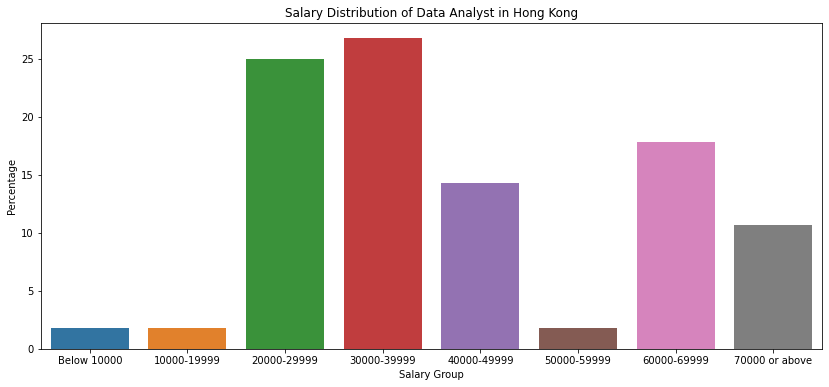

Singapore
                Salary group
20000-29999        32.098765
30000-39999        26.543210
40000-49999        15.740741
10000-19999         9.876543
50000-59999         7.098765
70000 or above      4.629630
60000-69999         2.777778
Below 10000         1.234568


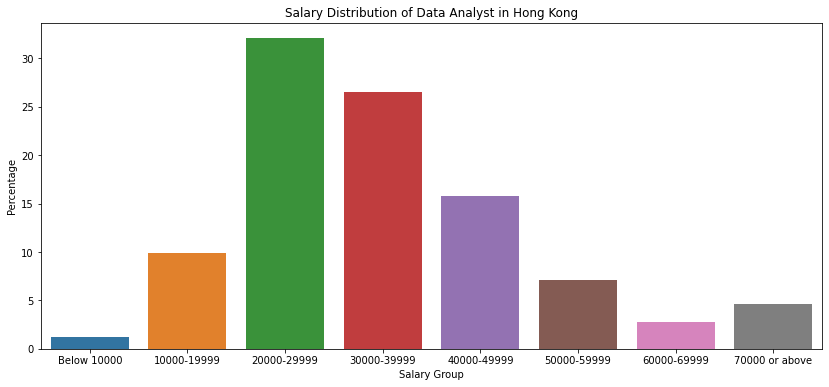

In [5]:
for region_df in df_ls:
    print(region_df['Country'][0])
    plt.figure(figsize=(14,6))
    salary = (region_df[region_df['Salary group'] != 'Not Mentioned']['Salary group'].value_counts(normalize=True) * 100).to_frame()
    print(salary)
    ax = sns.barplot(salary.index, salary['Salary group'],
              order = ['Below 10000',
                       '10000-19999',
                       '20000-29999',
                       '30000-39999',
                       '40000-49999',
                       '50000-59999',
                       '60000-69999',
                       '70000 or above']).set_title('Salary Distribution of Data Analyst in Hong Kong')
    plt.xlabel('Salary Group')
    plt.ylabel('Percentage')
    plt.show()

### Findings:
- Average Monthly Salary is around $ 20,000 - 40, 000.
- Indeed.com.sg has better structured data.
- Employers in Singapore are more wiling to disclose salary in job ads.

# Language Requirement
- To see which language is important in getting a data job

Hong Kong
     Job category variable  percentage
0    Data analyst  English   51.488616
1    Data analyst  Chinese   48.511384
2  Data scientist  English   57.258065
3  Data scientist  Chinese   42.741935


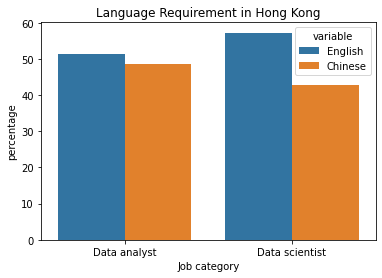

Singapore
     Job category variable  percentage
0    Data analyst  English   81.034483
1    Data analyst  Chinese   18.965517
2  Data scientist  English   83.050847
3  Data scientist  Chinese   16.949153


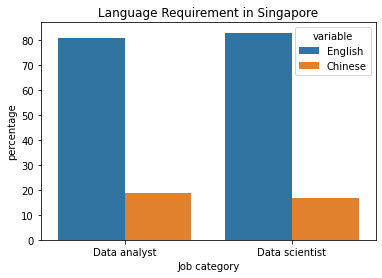

In [6]:
for region_df in df_ls:
    print(region_df['Country'][0])
    lang_df = pd.melt(region_df, id_vars =['Job category'], value_vars =['English', 'Chinese']) 
    lang_df =(lang_df[lang_df['value'].notnull()].groupby(['Job category']))['variable'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
    print(lang_df)
    sns.barplot(data=lang_df,
                  x=lang_df['Job category'],y =lang_df['percentage'], hue=lang_df['variable'],).set_title('Language Requirement in '+ region_df['Country'][0])
    plt.show()

### Findings:
- Hong Kong:
    - Needs to be fluent in both languages
    - Competitive advantage: Cantonese/Mandarin 
- Singapore:
    - Needs to be flurent in English


# Education Requirement

- To prevent from being distracted, all data without mentioning education level are removed


Hong Kong


/Users/mushroom/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mushroom/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/mushroom/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/mushroom/opt/

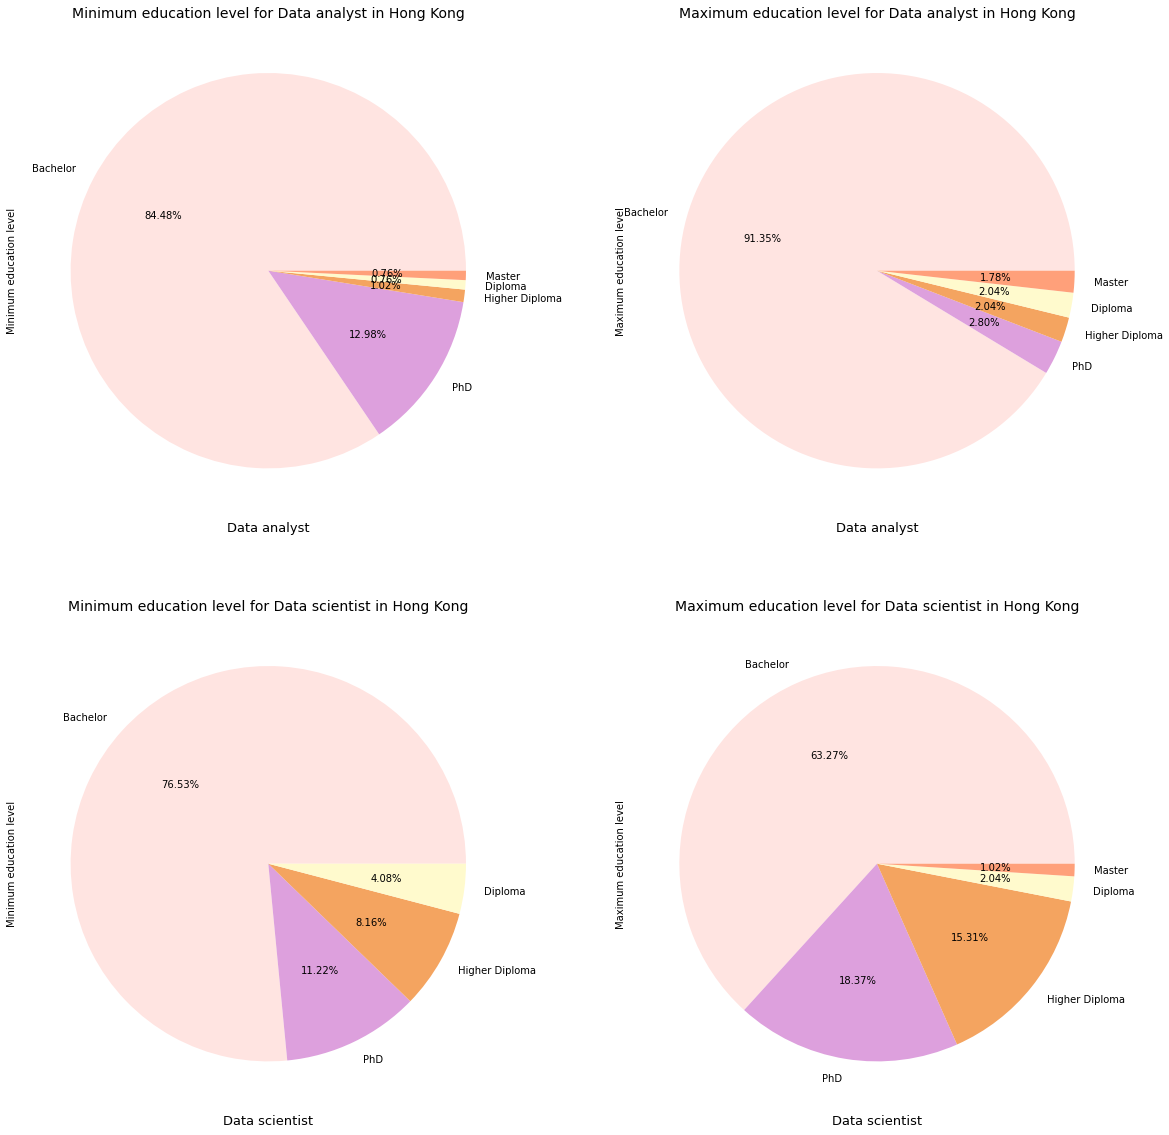

Singapore


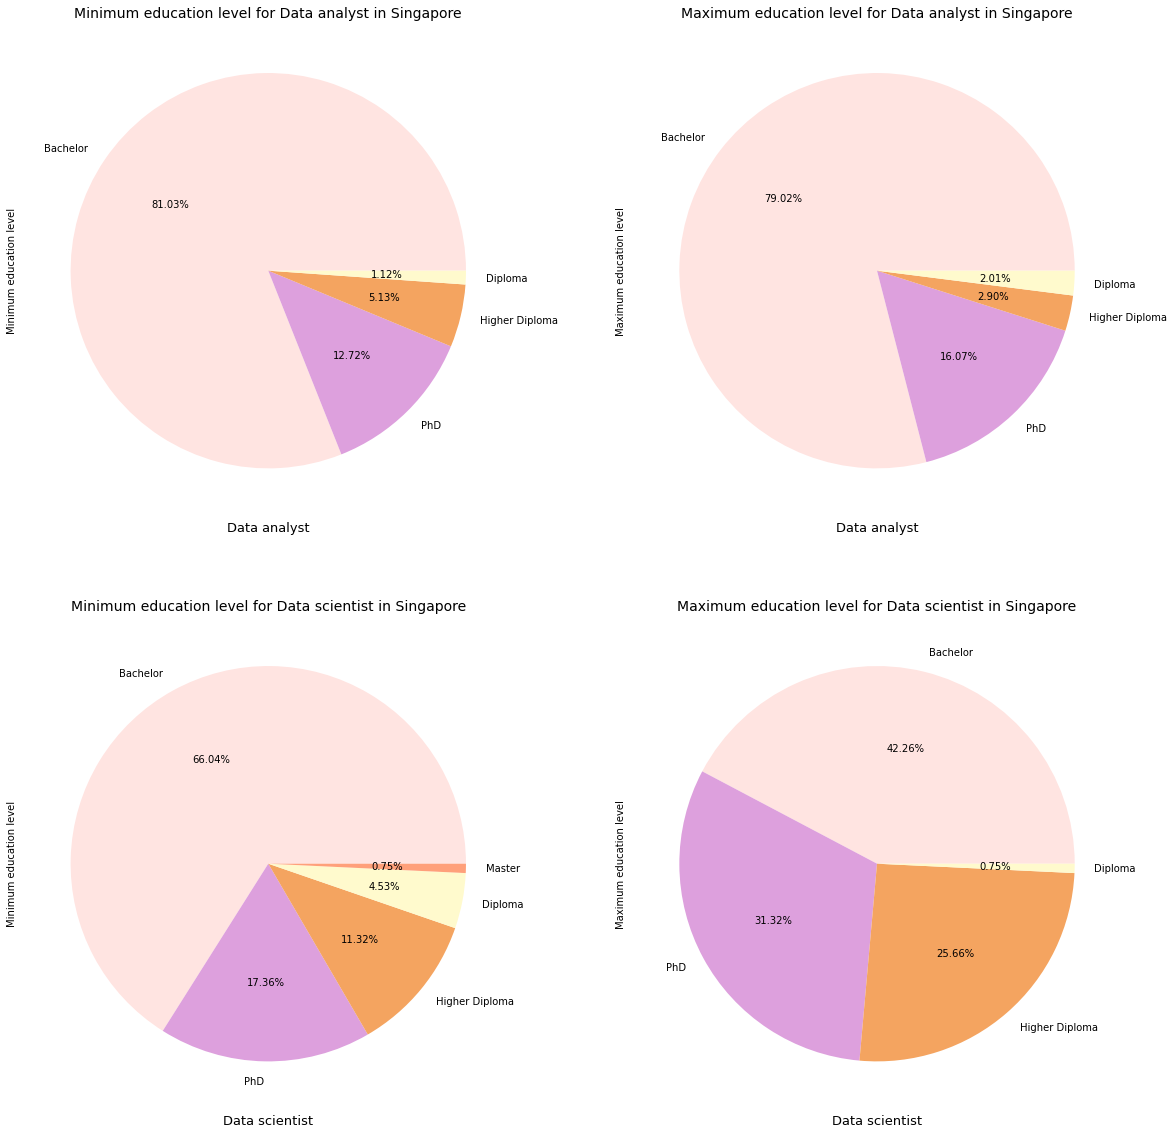

In [7]:
colors = ['mistyrose','plum','sandybrown','lemonchiffon','lightsalmon']
label = ['Bachelor','PhD','Higher Diploma','Diploma','Master']
    
plt_ls = [['Data analyst', 'Minimum education level'],
         ['Data analyst', 'Maximum education level'],
         ['Data scientist', 'Minimum education level'],
         ['Data scientist', 'Maximum education level']]

for region_df in df_ls:
    print(region_df['Country'][0])
    fig = plt.figure(figsize=(20,20))
    ax_ls = [fig.add_subplot(221), 
            fig.add_subplot(222),
            fig.add_subplot(223),
            fig.add_subplot(224)]
    for ax, i  in enumerate(plt_ls):
        pie = region_df[(region_df['Job category'] == i[0]) & (region_df[i[1]] != 'Not specified')][i[1]].value_counts().plot(kind = 'pie', autopct = '%.2f%%', colors=colors, labels=label, ax = ax_ls[ax] )
        pie.axes.set_title(i[1] + ' for ' + i[0] + ' in '+ region_df['Country'][0],fontsize=14)
        pie.set_xlabel(i[0],fontsize=13)
    plt.show()



###  Findings:
- Better to have a Bachelor Degree
<img src="https://elleryc.github.io/elleryc_portfolio/images/edulv2.png" style="width: 700px;">



# Visualisation Skills and Programming Skills

# Programming skills

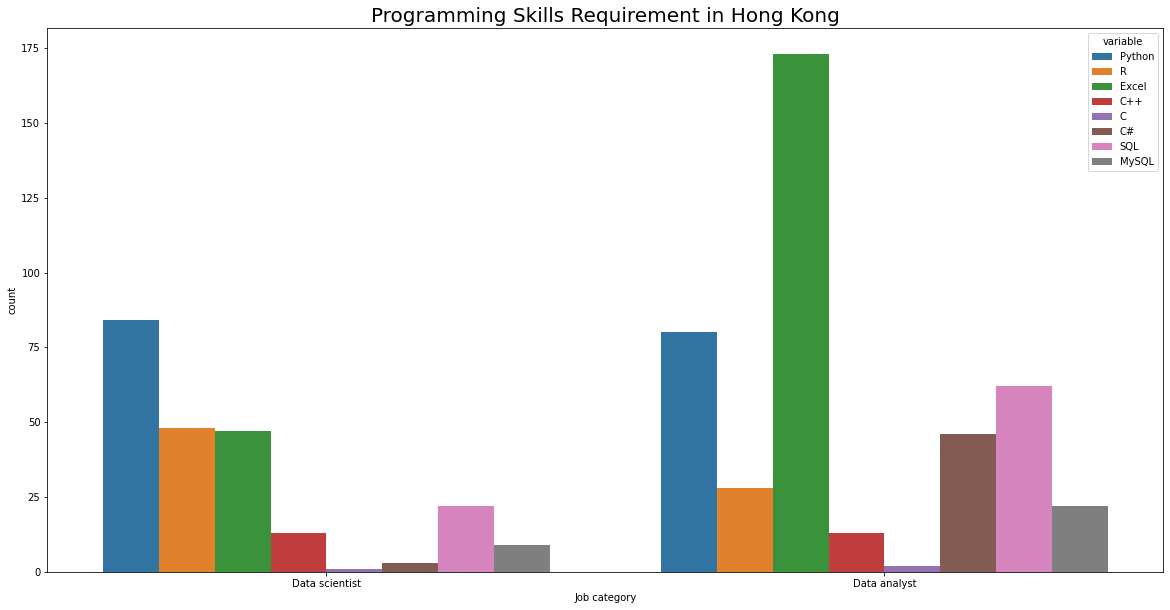

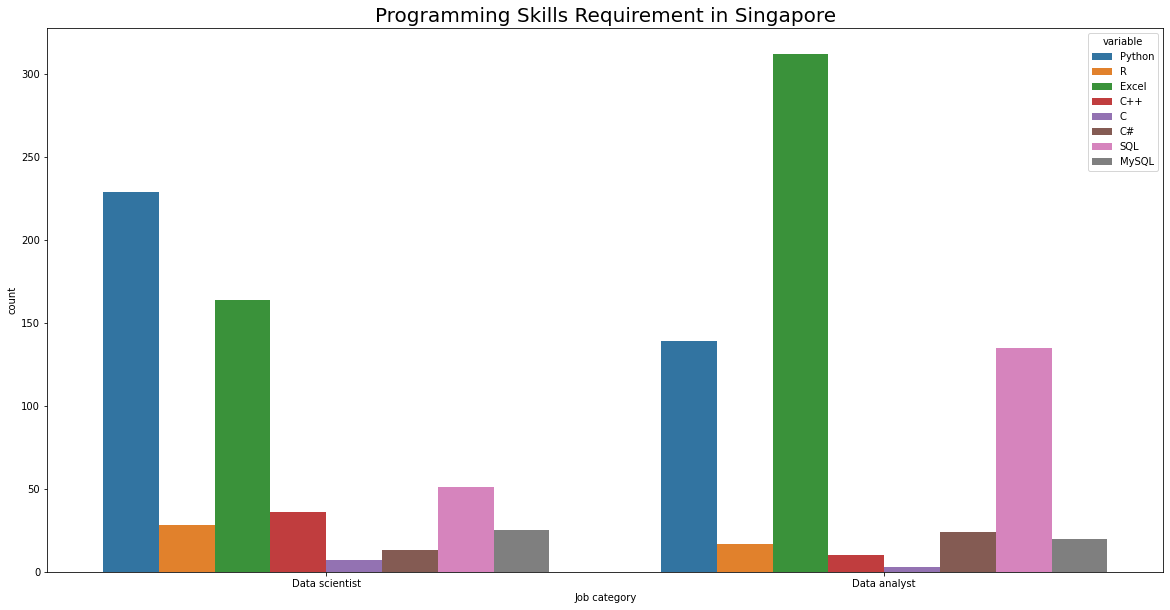

In [8]:
for region_df in df_ls:
    fig = plt.figure(figsize=(20,10))
    skill_df = pd.melt(region_df, id_vars =['Job category'], value_vars =['Python','R','Excel','C++','C','C#','SQL','MySQL']) 
    skill_df = skill_df[skill_df['value'].notnull()]
    cnt = sns.countplot(data=skill_df,x=skill_df['Job category'],hue=skill_df['variable'])
    cnt.axes.set_title('Programming Skills Requirement in ' + region_df['Country'][0],fontsize=20)
    plt.show()

### Findings:
- Python and Excel are essential programming tools. 
- Although the Excel skills is believed to be replaced by Python in the coming future, they are yet important for you to find an analytics job. Besides, we can see that more statistical models need to be run by data scientist in HK as R is not that common in Singapore.
<img src="https://elleryc.github.io/elleryc_portfolio/images/programming2.png" style="width: 700px;">


# Visualisation Skills

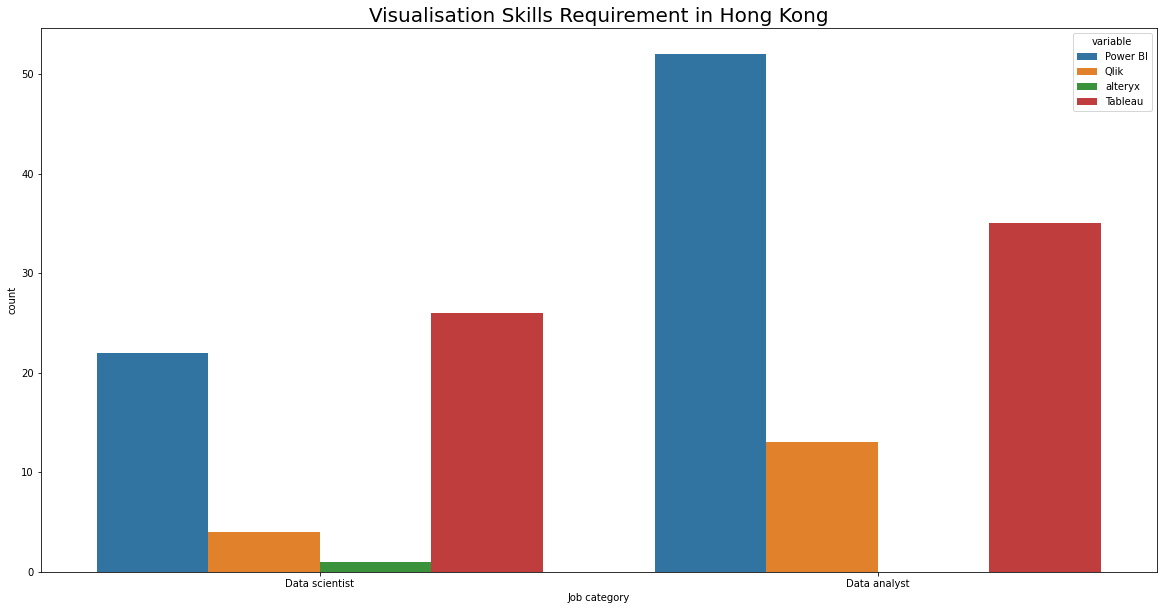

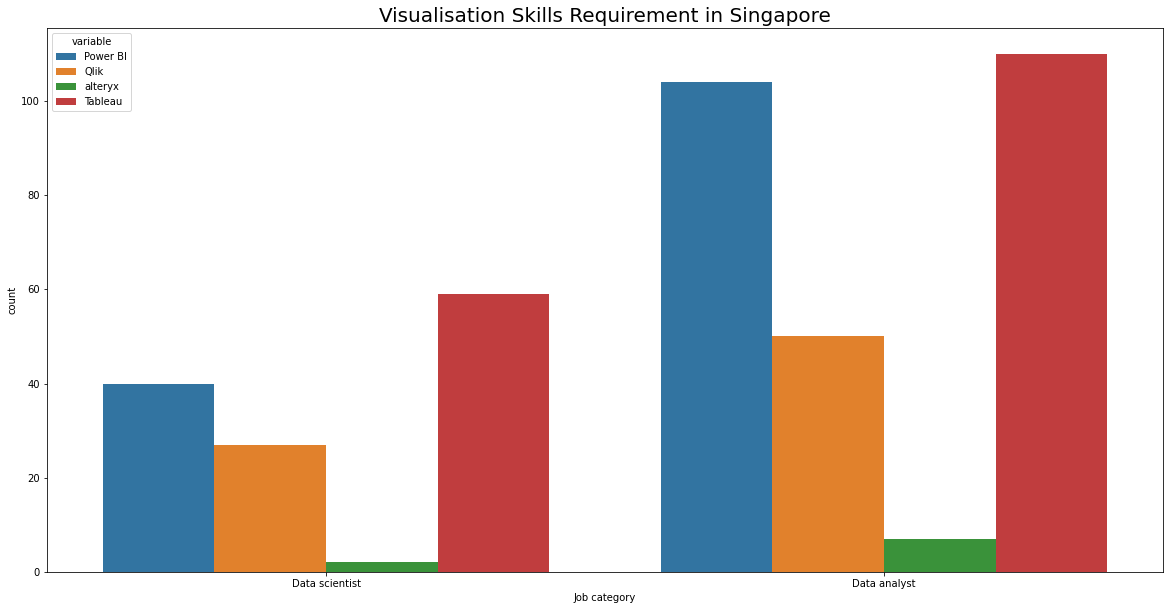

In [9]:
for region_df in df_ls:
    fig = plt.figure(figsize=(20,10))
    visual_df = pd.melt(region_df,id_vars=['Job category'], value_vars=['Power BI','Qlik','alteryx','Tableau'])
    visual_df = visual_df[visual_df['value'].notnull()]
    cnt = sns.countplot(data=visual_df,x=visual_df['Job category'],hue=visual_df['variable'])
    cnt.axes.set_title('Visualisation Skills Requirement in ' + region_df['Country'][0],fontsize=20)
    plt.show()

### Findings:
- Essential visualisation tool are Power BI and Tableau.

# Star Ratings and Company Reviews

- Try to explore the reputations of employer
- Get to know the employers in job market


In [10]:
star_df = sg_df[sg_df['Star group'] .notnull()]
sg_df

,index,Issued time,Country,Job category,Job title,Company,Part time/ Full Time,Star review,Number of reviews,Location,...,alteryx,Tableau,SPSS,Powerpoint,PostgreSQL,SQL,MySQL,Visualisation tool,Programming tool,Star group
0,642,0,Singapore,Data analyst,Digital Content Marketing Specialist,CLICK2VIEW PTE. LTD.,NaN,NaN,NaN,Shenton Way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
1,643,0,Singapore,Data scientist,"Assistant Manager, Data & Innovation",AXA INSURANCE PTE. LTD.,NaN,3.9,3713.0,Shenton Way,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,3.0 to 3.99 stars
2,644,0,Singapore,Data analyst,Business Analyst,NTT DATA SERVICES SINGAPORE PTE. LTD.,Full-time,3.5,2436.0,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0 to 3.99 stars
3,645,0,Singapore,Data analyst,Equity Research (Emerging Markets),Ambition,NaN,4.1,15.0,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0 to 4.99 stars
4,646,0,Singapore,Data scientist,Associate Product Owner,Yara,Full-time,NaN,NaN,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0 stars
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,1782,30,Singapore,Data analyst,Application Support Analyst (Financial Market),Confidential,NaN,NaN,NaN,Singapore,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,5.0 stars
1141,1783,30,Singapore,Data analyst,"Assistant Vice President / Vice President, APA...",Bank of America,NaN,3.8,29396.0,Singapore,...,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,Y,3.0 to 3.99 stars
1142,1784,30,Singapore,Data analyst,Senior Cyber Threat Intelligence Analyst,Marina Bay Sands,NaN,4.1,198.0,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0 to 4.99 stars
1143,1785,30,Singapore,Data analyst,"Principal/ Senior Analyst, Behavioural Science",Defence Science and Technology Agency,Full-time,3.4,780.0,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,3.0 to 3.99 stars


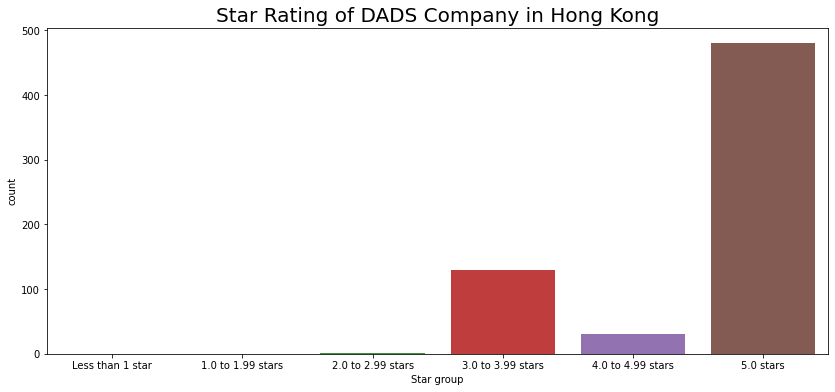

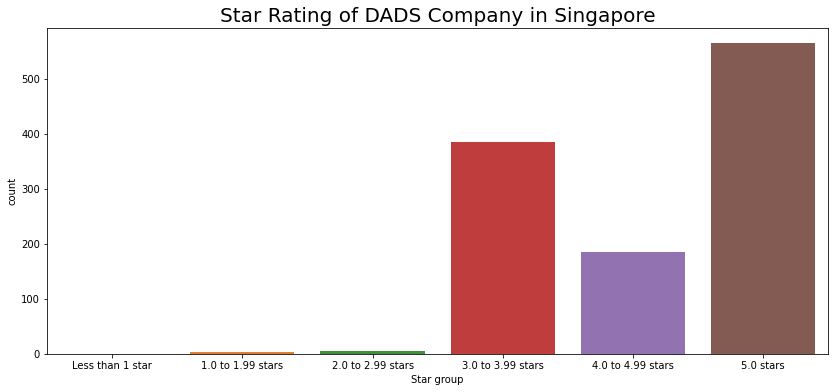

In [11]:
for region_df in df_ls:
    star_df = region_df[region_df['Star group'] .notnull()]
    plt.figure(figsize=(14,6))
    plot1 = sns.countplot(data=star_df, x=star_df['Star group'], order = ['Less than 1 star',
                           '1.0 to 1.99 stars',
                           '2.0 to 2.99 stars',
                           '3.0 to 3.99 stars',
                           '4.0 to 4.99 stars',
                           '5.0 stars'])
    plot1.axes.set_title('Star Rating of DADS Company in ' + region_df['Country'][0],fontsize=20)
    plt.show()
   

<Figure size 7200x72000 with 0 Axes>

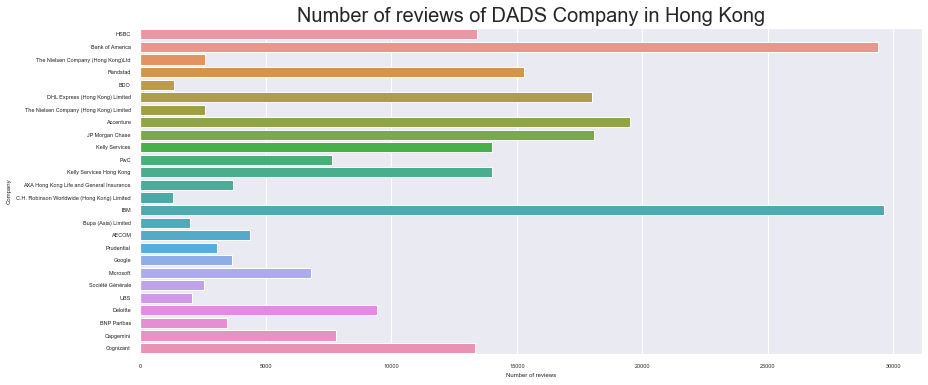

<Figure size 7200x72000 with 0 Axes>

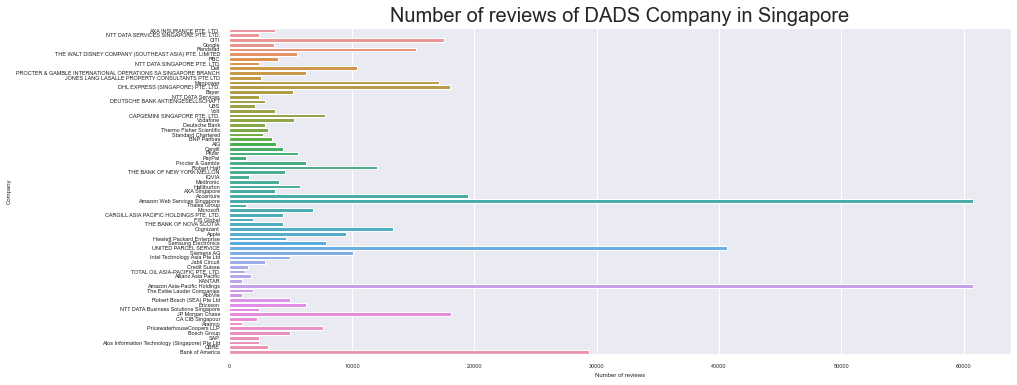

In [12]:
for region_df in df_ls:
    plt.figure(figsize=(100,1000))
    sns.set(font_scale = 0.5)
    review_df = region_df.drop_duplicates(['Company'],keep ='first')
    review_df = review_df[(review_df['Number of reviews'].notnull()) & (review_df['Number of reviews'] >= 1000)]
    plt.figure(figsize=(14,6))
    plot = sns.barplot(data=review_df,y='Company', x= 'Number of reviews')
    plot.axes.set_title('Number of reviews of DADS Company in ' + region_df['Country'][0],fontsize=20)
    plt.show()


### Findings:
- Reputation of most employers are average or above, which is quite good.
